In [12]:
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
dati = pd.read_csv('Bitcoin (€) da yfinance dal 17-09-2014 al 24-04-2024.csv')
dati = dati[['Date', 'Close']]
dati = dati.rename(columns = {'Date':'Timestamp', 'Close': 'Price'})
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])
dati['Timestamp'] = dati['Timestamp'].dt.strftime('%Y-%m-%d')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'], format='%Y-%m-%d')
dati

,Timestamp,Price
0,2014-09-17,355.957367
1,2014-09-18,328.539368
2,2014-09-19,307.761139
3,2014-09-20,318.758972
4,2014-09-21,310.632446
...,...,...
3503,2024-04-20,59876.710938
3504,2024-04-21,60956.074219
3505,2024-04-22,60919.242188
3506,2024-04-23,62729.296875


In [14]:
# dati = pd.read_csv('Bitcoin (€) da yfinance dal 06-05-2022 alle 21 al 05-05-2024 alle 19 con granularità oraria.csv')
# dati = dati[['Datetime', 'Close']]
# dati = dati.rename(columns = {'Datetime':'Timestamp', 'Close': 'Price'})
# dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])
# dati['Timestamp'] = dati['Timestamp'].dt.strftime('%Y-%m-%d %H')
# dati['Timestamp'] = pd.to_datetime(dati['Timestamp'], format='%Y-%m-%d %H')
# dati

In [15]:
data_inizio = '2014-09-17'
data_fine = '2024-04-24'
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
indice_fine = dati[dati['Timestamp'] == data_fine].index[0]
dati = dati[indice_inizio:indice_fine + 1].reset_index(drop=True)
dati

,Timestamp,Price
0,2014-09-17,355.957367
1,2014-09-18,328.539368
2,2014-09-19,307.761139
3,2014-09-20,318.758972
4,2014-09-21,310.632446
...,...,...
3503,2024-04-20,59876.710938
3504,2024-04-21,60956.074219
3505,2024-04-22,60919.242188
3506,2024-04-23,62729.296875


In [16]:
# data_inizio = '2023-03-01 00'
# data_fine = '2023-06-01 00'
# indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
# indice_fine = dati[dati['Timestamp'] == data_fine].index[0]
# dati = dati[indice_inizio:indice_fine + 1].reset_index(drop=True)
# dati

<h6> Eventuale cambio dati </h6>

In [17]:
def calcola_prezzo(t):
    return dati['Price'][t] #1000 - t + 100 * math.sin(2*math.pi * t / 4)

In [18]:
dati['Price'] = dati.index.map(calcola_prezzo)
dati

,Timestamp,Price
0,2014-09-17,355.957367
1,2014-09-18,328.539368
2,2014-09-19,307.761139
3,2014-09-20,318.758972
4,2014-09-21,310.632446
...,...,...
3503,2024-04-20,59876.710938
3504,2024-04-21,60956.074219
3505,2024-04-22,60919.242188
3506,2024-04-23,62729.296875


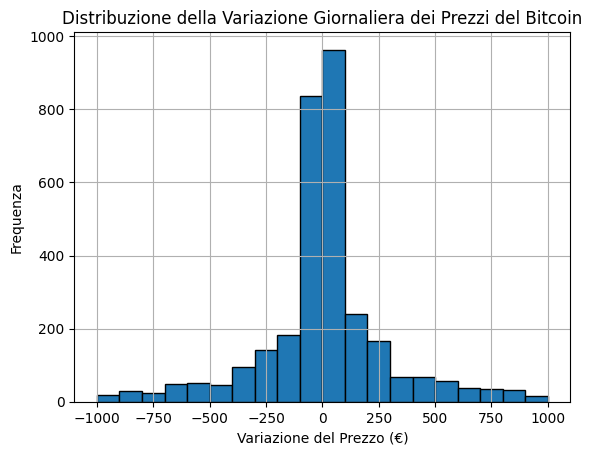

In [26]:
bin = 100
max_variazione = 1000
min_variazione = -1000

# Supponiamo che 'dati' sia un dizionario con una lista di prezzi sotto la chiave 'Price'
prezzi = dati['Price']

# Calcoliamo la variazione giornaliera dei prezzi
variazioni = [prezzi[i] - prezzi[i-1] for i in range(1, len(prezzi))]

# Creiamo l'istogramma delle variazioni dei prezzi
plt.hist(variazioni, bins=range(min_variazione, max_variazione + bin, bin), edgecolor='black')

plt.title('Distribuzione della Variazione Giornaliera dei Prezzi del Bitcoin')
plt.xlabel('Variazione del Prezzo (€)')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()

In [27]:
# Creiamo un dizionario per contare la frequenza di ogni intervallo
intervalli = range(min_variazione, max_variazione + bin, bin)
frequenze = {intervallo: 0 for intervallo in intervalli}

# Assegniamo ogni variazione al suo intervallo corrispondente
for variazione in variazioni:
    # Troviamo l'intervallo corrispondente per la variazione
    intervalli_possibili = [i for i in intervalli if i <= variazione]
    if intervalli_possibili:
        intervallo = max(intervalli_possibili)
        frequenze[intervallo] += 1

# Ora possiamo stampare il dizionario delle frequenze per vedere i valori associati a ogni intervallo
for intervallo, frequenza in frequenze.items():
    print(f"Intervallo: {intervallo}€ - {intervallo + 100}€, Frequenza: {frequenza}")

Intervallo: -1000€ - -900€, Frequenza: 19
Intervallo: -900€ - -800€, Frequenza: 28
Intervallo: -800€ - -700€, Frequenza: 25
Intervallo: -700€ - -600€, Frequenza: 48
Intervallo: -600€ - -500€, Frequenza: 52
Intervallo: -500€ - -400€, Frequenza: 47
Intervallo: -400€ - -300€, Frequenza: 94
Intervallo: -300€ - -200€, Frequenza: 141
Intervallo: -200€ - -100€, Frequenza: 182
Intervallo: -100€ - 0€, Frequenza: 837
Intervallo: 0€ - 100€, Frequenza: 963
Intervallo: 100€ - 200€, Frequenza: 239
Intervallo: 200€ - 300€, Frequenza: 167
Intervallo: 300€ - 400€, Frequenza: 68
Intervallo: 400€ - 500€, Frequenza: 67
Intervallo: 500€ - 600€, Frequenza: 57
Intervallo: 600€ - 700€, Frequenza: 38
Intervallo: 700€ - 800€, Frequenza: 35
Intervallo: 800€ - 900€, Frequenza: 31
Intervallo: 900€ - 1000€, Frequenza: 17
Intervallo: 1000€ - 1100€, Frequenza: 190


In [28]:
variazioni

[-27.417999267578125,
 -20.778228759765625,
 10.997833251953125,
 -8.12652587890625,
 2.326324462890625,
 26.230987548828125,
 -7.93975830078125,
 -8.573394775390625,
 -3.779754638671875,
 -3.86767578125,
 -17.450469970703125,
 -1.679107666015625,
 10.51788330078125,
 -2.46771240234375,
 -7.89483642578125,
 -8.790069580078125,
 -24.487396240234375,
 -6.615386962890625,
 4.9144287109375,
 4.432098388671875,
 11.52435302734375,
 10.68359375,
 -1.353485107421875,
 0.583709716796875,
 12.5618896484375,
 7.42059326171875,
 10.18963623046875,
 -9.183624267578125,
 -9.1334228515625,
 2.0196533203125,
 6.023345947265625,
 -1.222686767578125,
 -6.407623291015625,
 4.809234619140625,
 -0.91644287109375,
 -19.7513427734375,
 -0.5264587402344318,
 -8.740356445312443,
 5.756195068359375,
 -1.9450378417969318,
 2.870666503906307,
 -15.082611083984375,
 8.189300537109375,
 -3.739532470703125,
 -10.038360595703125,
 0.59295654296875,
 1.53924560546875,
 1.0872802734374432,
 8.770172119140682,
 10.0967